In [1]:
import numpy as np
import random
from scipy.stats import bernoulli
import scipy
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
'''
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
'''

'\nnp_load_old = np.load\n\n# modify the default parameters of np.load\nnp.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)\n'

In [2]:
vtr = np.load("paper_vtr_data_deeptree/model_vtr.npy")
mat = np.load("paper_vtr_data_deeptree/model_mat.npy")
eg_vtr = np.load("paper_vtr_data_deeptree/model_eg_vtr.npy")
eg_mat = np.load("paper_vtr_data_deeptree/model_eg_mat.npy")

R_vtr = np.load("paper_vtr_data_deeptree/R_vtr.npy")
R_mat = np.load("paper_vtr_data_deeptree/R_mat.npy")
R_avg_vtr = np.load("paper_vtr_data_deeptree/R_avg_eg_vtr.npy")
R_avg_mat = np.load("paper_vtr_data_deeptree/R_avg_mat.npy")
R_eg = np.load("paper_vtr_data_deeptree/R_eg_vtr.npy")
R_eg_mat = np.load("paper_vtr_data_deeptree/R_mat_eg.npy")
    
sem_vtr = np.load("paper_vtr_data_deeptree/sem_vtr.npy")
sem_mat = np.load("paper_vtr_data_deeptree/sem_mat.npy")

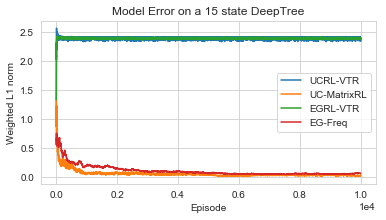

In [5]:
i = 2
plt.figure(figsize=(6,3))
sns.set_style("whitegrid")
plt.ticklabel_format(style='sci',axis='x',scilimits=(0,0))
plt.plot(vtr[i,:],label='UCRL-VTR')
plt.plot(mat[i,:],label='UC-MatrixRL')
plt.plot(eg_vtr[i,:],label='EGRL-VTR')
plt.plot(eg_mat[i,:],label='EG-Freq')
plt.title("Model Error on a " + str((i+1)*4 + 3) + " state DeepTree")
plt.xlabel("Episode")
plt.ylabel("Weighted L1 norm")
plt.legend()
plt.savefig("Dropbox/paper-icml-VTR-2020/model_err_deeptree_" +str((i+1)*4) + ".pdf")
plt.show()


In [6]:
def regret(i,R):
    v = [1.0,1.0,1.0]
    regret = np.zeros(len(R))
    for j in range(len(R)):
        regret[j] = (j+1)*v[i] - R[j]
        
    return regret
        

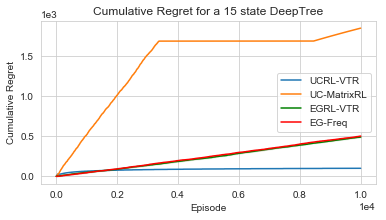

In [9]:
plt.figure(figsize=(6,3))
i = 2
sns.set_style("whitegrid")
plt.ticklabel_format(style='sci',axis='both',scilimits=(0,0))

plt.plot(regret(i,R_vtr[i,:]),label="UCRL-VTR")

plt.plot(regret(i,R_mat[i,:]),label="UC-MatrixRL")

plt.plot(regret(i,R_avg_vtr[i,:]),label="EGRL-VTR",color='green')
plt.fill_between(range(10000),regret(i,R_avg_vtr[i,:])-sem_vtr[i,:],regret(i,R_avg_vtr[i,:])+sem_vtr[i,:], \
                alpha = 0.1,color='green')
plt.plot(regret(i,R_avg_mat[i,:]),label="EG-Freq",color='red')
plt.fill_between(range(10000),regret(i,R_avg_mat[i,:])-sem_mat[i,:],regret(i,R_avg_mat[i,:])+sem_mat[i,:], \
                alpha = 0.1,color='red')

plt.legend()
plt.title("Cumulative Regret for a " + str((i+1)*4 + 3) + " state DeepTree")
plt.xlabel("Episode")
plt.ylabel("Cumulative Regret")
plt.savefig("Dropbox/paper-icml-VTR-2020/cum_regret_deeptree_" +str((i+1)*4) + ".pdf")
plt.show()